In [1]:
import numpy as np
import scipy as sp
from scipy.integrate import odeint
import matplotlib.pyplot as plt

from probDE.utils.utils import root_gen
from probDE.Kalman.kalman_multi_solver import kalman_multi_solver

In [2]:
def f(x,t):
    return [x[0]+2*x[1], 3*x[0]+2*x[1]]

def f2(x,t):
    return [x[0]+2*x[3], 3*x[0]+2*x[3]]

In [3]:
n = 2
p = 3
N = 100
L = 0
U = 1
delta_t = np.array([(U - L)/N])
tseq = np.linspace(L, U, N)
mu = np.zeros(n*p)
sigmalst = [0.1]*n
rootlst = [root_gen(10, p)]*n
w_vec = np.array([[0,1], [0,1]])
x0 = [0, 4]
a = np.array([[0,8], [4,8]])

In [4]:
# Exact solution
exact = odeint(f, x0, tseq)
Xn, Xn_mean, Xn_var = kalman_multi_solver(f2, L, U, N, mu, sigmalst, rootlst, w_vec, a)

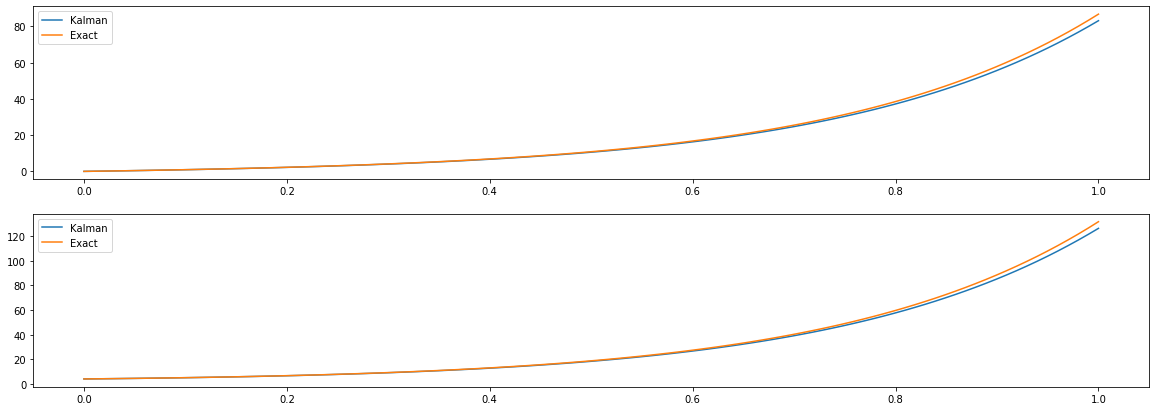

In [5]:
_, axs = plt.subplots(n, 1, figsize=(20, 7))
for i in range(n):
    axs[i].plot(tseq, Xn[:, p*i], label="Kalman")
    axs[i].plot(tseq, exact[:, i], label='Exact')
    axs[i].legend(loc='upper left')

In [6]:
def lorenz(state, t):
    rho = 28.0
    sigma = 10.0
    beta = 8.0 / 3.0
    x, y, z = state  # Unpack the state vector
    return -sigma*x + sigma*y, rho*x - y -x*z, -beta*z + x*y 

def lorenz2(X0, t):
    rho = 28.0
    sigma = 10.0
    beta = 8.0 / 3.0
    p = 3
    x, y, z = X0[p*0], X0[p*1], X0[p*2]
    return -sigma*x + sigma*y, rho*x - y -x*z, -beta*z + x*y 


In [7]:
n = 3
p = 3
N = 5000
L = 0
U = 20
delta_t = np.array([(U - L)/N])
tseq = np.linspace(L, U, N)
mu = np.zeros(n*p)
sigma = .001
roots = root_gen(1.3, p)
rootlst = [roots*10]*n
sigmalst = [sigma]*n
w_vec = np.array([[0,1], [0,1], [0,1]])

x0 = [-12, -5, 38]
v0 = lorenz(x0, 0)
a = np.array(list(zip(x0, v0)))

Xn, Xn_mean, Xn_var = kalman_multi_solver(lorenz2, L, U, N, mu, sigmalst, rootlst, w_vec, a)

In [8]:
# Exact solution
exact = odeint(lorenz, x0, tseq)

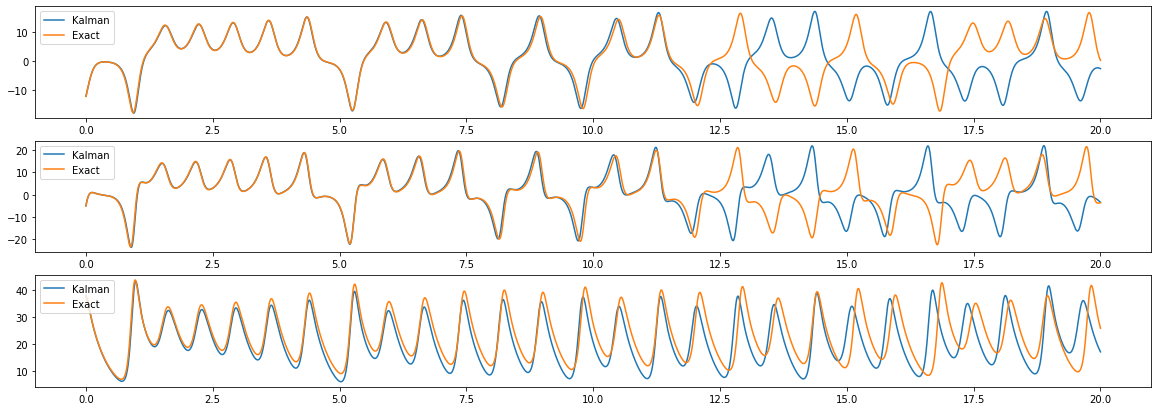

In [9]:
_, axs = plt.subplots(n, 1, figsize=(20, 7))
for i in range(n):
    axs[i].plot(tseq, Xn[:, p*i], label="Kalman")
    axs[i].plot(tseq, exact[:, i], label='Exact')
    axs[i].legend(loc='upper left')